In [1]:
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib

# Package to implement ML Algorithms
import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

# Package for data partitioning
from sklearn.model_selection import train_test_split

# Package for generating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Package for generating classification report
from sklearn.metrics import classification_report

# Import packages to implement Stratified K-fold CV
from sklearn.model_selection import KFold # For creating folds

# Import Package to implement GridSearch CV
from sklearn.model_selection import GridSearchCV

# Importing package for Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV

# Package to record time
import time

# Package for Data pretty printer
from pprint import pprint

# Module to save and load Python objects to and from files
import pickle 

# Ignore Deprecation Warnings
import warnings
warnings.filterwarnings('ignore')

# Package for XGBoost
from xgboost import XGBRegressor

# Display inline plots as vector-based (svg)
%config InlineBackend.figure_formats = ['svg']

%matplotlib inline

In [2]:
# Import Data
traffic_df = pd.read_csv('Traffic_Volume.csv')
traffic_df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
# Extract the month, day of the week, and time of day from the 'date_time' column
traffic_df['month'] = pd.to_datetime(traffic_df['date_time']).dt.month
traffic_df['day_of_week'] = pd.to_datetime(traffic_df['date_time']).dt.weekday
traffic_df['time_of_day'] = pd.to_datetime(traffic_df['date_time']).dt.strftime('%H')

In [4]:
traffic_df['traffic_volume'].value_counts(normalize=True)
X = traffic_df.drop(columns = ['traffic_volume','weather_description','date_time'])
y = traffic_df['traffic_volume']

cat_var = ['holiday', 'weather_main','month','day_of_week','time_of_day']
X_encoded = pd.get_dummies(X, columns = cat_var)

train_X, test_X, train_y, test_y = train_test_split(X_encoded, y, test_size = 0.2, random_state = 1)


Decision Tree

In [8]:
# Define your model
regressor = DecisionTreeRegressor(random_state = 2)

# Ranges for hyperparameters
hyper_params = {
    'max_depth': list(range(2, 23)),
    'min_samples_leaf': list(range(2, 23)),
    'min_samples_split': list(range(2, 23))
}

# Creating folds
folds = KFold(n_splits = 5, shuffle = True, random_state = 3)

# Create the random search CV
random_model_cv = RandomizedSearchCV(estimator = regressor,
                                     param_distributions = hyper_params,
                                     scoring = 'r2',
                                     cv = folds,
                                     verbose = 1,
                                     n_jobs = -1,
                                     n_iter = 50,
                                     random_state = 4)


# Fit the model
start = time.time()            # Start Time
random_model_cv.fit(train_X, train_y)
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Training time: 14.426593542098999s


In [9]:
# Return set of parameters with the best performance
print(random_model_cv.best_params_)

# Return the performance metric score
print(random_model_cv.best_score_)

{'min_samples_split': 20, 'min_samples_leaf': 20, 'max_depth': 22}
0.9350860381837002


In [10]:
hyper_params_new = {
    'max_depth': list(range(20,24)),
    'min_samples_leaf': list(range(18, 22)),
    'min_samples_split': list(range(18, 22))
}

In [11]:
model_cv = GridSearchCV(estimator = regressor,
                        param_grid = hyper_params_new,
                        scoring = 'r2',
                        cv = folds,
                        verbose = 1,
                        n_jobs = -1)
# Fit the model
start = time.time()            # Start Time
model_cv.fit(train_X, train_y)
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Training time: 18.6946120262146s


In [12]:
# Return set of parameters with the best performance
print(model_cv.best_params_)

# Return the performance metric score
print(model_cv.best_score_)

{'max_depth': 23, 'min_samples_leaf': 20, 'min_samples_split': 18}
0.9362238956938794


In [13]:
hyper_params_new = {
    'max_depth': list(range(18,23)),
    'min_samples_leaf': list(range(18, 22)),
    'min_samples_split': list(range(18, 22))
}

In [14]:
model_cv = GridSearchCV(estimator = regressor,
                        param_grid = hyper_params_new,
                        scoring = 'r2',
                        cv = folds,
                        verbose = 1,
                        n_jobs = -1)
# Fit the model
start = time.time()            # Start Time
model_cv.fit(train_X, train_y)
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Training time: 21.452025413513184s


In [15]:
# Return set of parameters with the best performance
print(model_cv.best_params_)

# Return the performance metric score
print(model_cv.best_score_)

{'max_depth': 22, 'min_samples_leaf': 20, 'min_samples_split': 18}
0.9350860381837002


In [16]:
bestClassTree = model_cv.best_estimator_
print(bestClassTree)

DecisionTreeRegressor(max_depth=22, min_samples_leaf=20, min_samples_split=18,
                      random_state=2)


In [25]:
best_hyper_params = {
    'max_depth': [22],
    'min_samples_leaf': [20],
    'min_samples_split': [18]
}

# Define your model
regressor = DecisionTreeRegressor(random_state = 2)

# Creating folds
folds = KFold(n_splits = 5, shuffle = True, random_state = 3)

model_cv1 = GridSearchCV(estimator = regressor,
                        param_grid = best_hyper_params,
                        scoring = 'r2',
                        cv = folds,
                        verbose = 1,
                        n_jobs = -1)
# Fit the model
start = time.time()            # Start Time
model_cv1.fit(train_X, train_y)
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Training time: 3.4399890899658203s


In [26]:
# predictions on test set
y_pred1 = model_cv1.predict(test_X)

score1 = model_cv1.score(train_X, train_y)
print('R-squared:', score1)

R-squared: 0.9417378344825197


In [23]:
bestClassTree = DecisionTreeRegressor(max_depth=22, min_samples_leaf=20, min_samples_split=18,random_state=2)


In [18]:
# Storing importance values from the best fit model
importance = bestClassTree.feature_importances_

# Displaying feature importance as a dataframe
feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

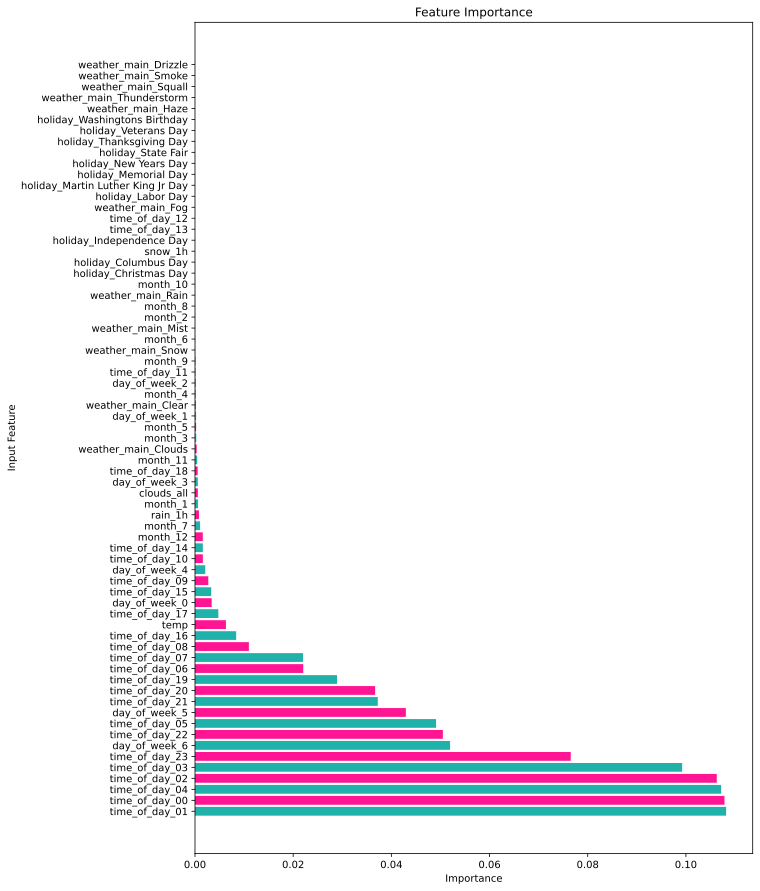

In [19]:
# Selecting features with non-zero importance values
feature_imp_nonzero = feature_imp[feature_imp['Importance'] != 0.0]

# Bar plot
plt.figure(figsize=(10, 15), dpi = 100)
plt.barh(feature_imp['Feature'], feature_imp['Importance'], color = ['lightseagreen', 'deeppink'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title("Feature Importance");
plt.savefig('traffic_importance.svg')

In [20]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 200, num = 5)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 20, num = 10)]

# Minimum number of samples required to split a node
min_samples_split = [5, 10, 20]

# Minimum number of samples required at each leaf node
min_samples_leaf = [5, 10, 20]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

pprint(random_grid)

{'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
 'min_samples_leaf': [5, 10, 20],
 'min_samples_split': [5, 10, 20],
 'n_estimators': [50, 87, 125, 162, 200]}


In [21]:
# Define your model
regressor2 = RandomForestRegressor(random_state = 2)

# Creating folds
folds = KFold(n_splits = 5, shuffle = True, random_state = 3)

# Create the random search CV
random_model_cv = RandomizedSearchCV(estimator = regressor2,
                                     param_distributions = random_grid,
                                     scoring = 'r2',
                                     cv = folds,
                                     verbose = 1,
                                     n_jobs = -1,
                                     n_iter = 100,
                                     random_state = 4)


# Fit the model
start = time.time()            # Start Time
random_model_cv.fit(train_X, train_y)
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 5 folds for each of 100 candidates, totalling 500 fits


KeyboardInterrupt: 

In [11]:
# Return set of parameters with the best performance
print(random_model_cv.best_params_)

# Return the performance metric score
print(random_model_cv.best_score_)

{'n_estimators': 125, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': 20}
0.9372444442042221


In [18]:
hyper_params_new = {
    'max_depth': list(range(18,22)),
    'min_samples_leaf': list(range(3, 7)),
    'min_samples_split': list(range(8, 12)),
    'n_estimators': [50, 100, 150]
}

In [19]:
model_cv = GridSearchCV(estimator = regressor2,
                        param_grid = hyper_params_new,
                        scoring = 'r2',
                        cv = folds,
                        verbose = 1,
                        n_jobs = -1)
# Fit the model
start = time.time()            # Start Time
model_cv.fit(train_X, train_y)
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Training time: 3803.5792903900146s


In [20]:
# Return set of parameters with the best performance
print(model_cv.best_params_)

# Return the performance metric score
print(model_cv.best_score_)

{'max_depth': 21, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 150}
0.9394524035310349


In [21]:
bestForest = model_cv.best_estimator_
print(bestForest)

RandomForestRegressor(max_depth=21, min_samples_leaf=4, min_samples_split=8,
                      n_estimators=150, random_state=2)


In [27]:
# Define your model
regressor2 = RandomForestRegressor(random_state = 2)

best_hyper_params2 = {
    'max_depth': [21],
    'min_samples_leaf': [4],
    'min_samples_split': [8],
    'n_estimators': [150]
}

model_cv2 = GridSearchCV(estimator = regressor2,
                        param_grid = best_hyper_params2,
                        scoring = 'r2',
                        cv = folds,
                        verbose = 1,
                        n_jobs = -1)
# Fit the model
start = time.time()            # Start Time
model_cv2.fit(train_X, train_y)
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Training time: 89.05523371696472s


In [28]:
# predictions on test set
y_pred2 = model_cv2.predict(test_X)

score2 = model_cv2.score(train_X, train_y)
print('R-squared:', score2)

R-squared: 0.949814338235056


In [29]:
bestForest = RandomForestRegressor(max_depth=21, min_samples_leaf=4, min_samples_split=8,
                      n_estimators=150, random_state=2)

In [22]:
# predictions on test set
y_pred = model_cv.predict(test_X)

score2 = model_cv.score(train_X, train_y)
print('R-squared:', score2)

R-squared: 0.949814338235056


AdaBoostRegressor

In [8]:
regressor3 = AdaBoostRegressor(random_state = 2)
folds = KFold(n_splits = 5, shuffle = True, random_state = 3)


In [22]:
# Define your model
regressor3 = AdaBoostRegressor(random_state = 2)

hyper_params = {
    'n_estimators': [50, 100, 250, 500],
    'learning_rate': np.linspace(0.01,1,10),
    'base_estimator': [DecisionTreeRegressor(max_depth=depth) for depth in range (1,11)],
    'loss': ['linear','square','exponential']
}

# Create the random search CV
random_model_cv = RandomizedSearchCV(estimator = regressor3,
                                     param_distributions=hyper_params,
                                     scoring = 'r2',
                                     cv = folds,
                                     verbose = 1,
                                     n_jobs = -1,
                                     n_iter = 50,
                                     random_state = 4)


# Fit the model
start = time.time()            # Start Time
random_model_cv.fit(train_X, train_y)
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Training time: 1533.051924943924s


In [23]:
# Return set of parameters with the best performance
print(random_model_cv.best_params_)

# Return the performance metric score
print(random_model_cv.best_score_)

{'n_estimators': 500, 'loss': 'linear', 'learning_rate': 0.01, 'base_estimator': DecisionTreeRegressor(max_depth=9)}
0.7901486742306124


In [6]:
hyper_params_new = {
    'n_estimators': [500, 600],
    'learning_rate': [0.01,0.02],
    'base_estimator': [DecisionTreeRegressor(max_depth=9)],
    'loss': ['linear']
}

In [9]:
model_cv = GridSearchCV(estimator = regressor3,
                        param_grid = hyper_params_new,
                        scoring = 'r2',
                        cv = folds,
                        verbose = 1,
                        n_jobs = -1)
# Fit the model
start = time.time()            # Start Time
model_cv.fit(train_X, train_y)
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Training time: 634.939924955368s


In [10]:
# Return set of parameters with the best performance
print(model_cv.best_params_)

# Return the performance metric score
print(model_cv.best_score_)

{'base_estimator': DecisionTreeRegressor(max_depth=9), 'learning_rate': 0.02, 'loss': 'linear', 'n_estimators': 500}
0.8110256425652735


In [11]:
bestAda = model_cv.best_estimator_
print(bestAda)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=9),
                  learning_rate=0.02, n_estimators=500, random_state=2)


In [30]:
bestAda=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=9),
                  learning_rate=0.02, n_estimators=500, random_state=2)

In [12]:
# predictions on test set
y_pred = model_cv.predict(test_X)

score3 = model_cv.score(train_X, train_y)
print('R-squared:', score3)

R-squared: 0.8142486179669973


XGBoost

In [13]:
hyper_params = {
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'n_estimators': np.arange(50, 200, 10),
    'max_depth': np.arange(3, 10),
    'subsample': np.linspace(0.5, 1.0, 6),
    'colsample_bytree': np.linspace(0.5, 1.0, 6),
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 1, 5, 10]
}

In [14]:
regressor4 = XGBRegressor(random_state = 2)

In [40]:
# Define your model
regressor4 = XGBRegressor(random_state = 2)

# Create the random search CV
random_model_cv = RandomizedSearchCV(estimator = regressor4,
                                     param_distributions=hyper_params,
                                     scoring = 'r2',
                                     cv = folds,
                                     verbose = 1,
                                     n_jobs = -1,
                                     n_iter = 50,
                                     random_state = 4)


# Fit the model
start = time.time()            # Start Time
random_model_cv.fit(train_X, train_y)
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Training time: 458.6381824016571s


In [41]:
# Return set of parameters with the best performance
print(random_model_cv.best_params_)

# Return the performance metric score
print(random_model_cv.best_score_)

{'subsample': 0.6, 'reg_lambda': 5, 'reg_alpha': 0, 'n_estimators': 170, 'max_depth': 9, 'learning_rate': 0.10666666666666666, 'gamma': 1, 'colsample_bytree': 1.0}
0.9505377004861815


In [18]:
hyper_params_new = {
    'learning_rate': [0.1,0.11],
    'n_estimators': [170],
    'max_depth': list(range(8, 10)),
    'subsample': [0.6],
    'colsample_bytree': [0.9,1],
    'gamma': [0.9,1],
    'reg_alpha': [0],
    'reg_lambda': [4, 5]
}

In [19]:
model_cv = GridSearchCV(estimator = regressor4,
                        param_grid = hyper_params_new,
                        scoring = 'r2',
                        cv = folds,
                        verbose = 1,
                        n_jobs = -1)
# Fit the model
start = time.time()            # Start Time
model_cv.fit(train_X, train_y)
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Training time: 63.117436170578s


In [20]:
# Return set of parameters with the best performance
print(model_cv.best_params_)

# Return the performance metric score
print(model_cv.best_score_)

{'colsample_bytree': 0.9, 'gamma': 1, 'learning_rate': 0.11, 'max_depth': 9, 'n_estimators': 170, 'reg_alpha': 0, 'reg_lambda': 5, 'subsample': 0.6}
0.9504632343679171


In [21]:
bestXGB = model_cv.best_estimator_
print(bestXGB)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.11, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=170, n_jobs=None,
             num_parallel_tree=None, random_state=2, ...)


In [22]:
# predictions on test set
y_pred = model_cv.predict(test_X)

score4 = model_cv.score(train_X, train_y)
print('R-squared:', score4)

R-squared: 0.9705382457031485


In [31]:
# Creating the file where we want to write the model
dt_pickle = open('decision_tree_traffic.pickle', 'wb') 
rf_pickle = open('rf_traffic.pickle','wb')
ada_pickle = open('ada_traffic.pickle','wb')
xgb_pickle = open('xgb_traffic.pickle','wb')

# Write DT model to the file
pickle.dump(bestClassTree, dt_pickle) 
pickle.dump(bestForest,rf_pickle)
pickle.dump(bestAda,ada_pickle)
pickle.dump(bestXGB,xgb_pickle)

# Close the file
dt_pickle.close() 
rf_pickle.close()
ada_pickle.close()
xgb_pickle.close()